# Исследование продаж  компьютерных игр в интернет магазине "Стримчик"

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

#### Цель исследования:
Выявить определяющие успешность игры закономерности,ч то позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
#### Ход исследования: 
Данные о продаже игр я получу из файла "/datasets/games.csv". О качестве данных ничего неизвестно,поэтому перед тем как пресутпить к цели исследования понадобится обзор данных.
Я проверю данные на ошибки и оценю их влияние на исследование. Затем на этапе предобработке я поищу возможность исправить все ошибки данных, которые не приведут к искажению конечного результата. Далее создам необходимые стобцы и приступлю к проведению исследовательского анализа.

Таким образом мое исследование пройдет в шесть этапов:

- Обзор Данных
- предобработка данных
- исследовательский анализ данных
- составление портрета пользователя каждого региноа
- проверки гипотез
- написание общего вывода


#  1. Откройте файл с данными и изучите общую информацию

In [2]:
from scipy import stats as st
from math import factorial
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns





In [3]:
#создадим переменную и прочитаем файл с данными
df = pd.read_csv('/datasets/games.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
#смотрим информацию по данным
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


- Name - название игры
- Platform - платформа
- Year_of_Release - год выпуска
- Genre - жанр игры
- NA_sales - продажи в Северной Америке (млн. проданных копий)
- EU_sales - продажи в Европе (млн. проданных копий)
- JP_sales - продажи в Японии (млн. проданных копий)
- Other_sales - продажи в других странах (млн. проданных копий)
- Critic_Score - оценка критиков (максимум 100 баллов)
- User_score - оценка пользователей (максимум 10 баллов)
- Rating - возрастной рейтинг организации ESRB (англ. Entertainment Spftware Rating Board)

Открыл файл с данными "/datasets/games.csv". С помощью метода info() узнал данные о таблице. 

# 2. Предобработка Данных

In [5]:
#Приведем название столбцов к нижнему регистру
df.columns = df.columns.str.lower()
df


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


- Проведем работу с пропусками,удалим где значение не сыграют роли в исследовании и заменим где это возможно







In [6]:
#Выведем количество пропущенных значений для каждого столбца,использывав комбинацию двух методов.
df.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [7]:
df.shape


(16715, 11)

In [8]:
#Удаляем строки из года выпуска,так как их сравнительно мало и они не повлияют на дальнейшее исследование,а заменить их нечем.
df = df.dropna(subset=['year_of_release'])

#Удаляем строки из названия игры,так как их  всего 2 и они не повлияют на дальнейшее исследование,а заменить их нечем.
df = df.dropna(subset=['name'])

#Заменим пропущенные значения в стобце с возврастным рейтингом на "unknown"
df['rating'] = df['rating'].fillna('unknown')

df.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating                0
dtype: int64

In [9]:
#С помощью метода shape проверили сколько строк\столбцов было удалено
df.shape

(16444, 11)

1. Удалили пропуски в стобцах "name" и "year_of_release". В столбце с названиями было всего 2 пропуска из 16 тыс,в которых отсутсвовала оценка пользователей,критиков и также отсутствовали рейтинги,соответсвенно сделали вывод,что данные удаление данных не повлияет на анализ,так же в столбце с годами 269 пропусков,что является менее 2% от общего кол-ва.В столбце "rating"(рейтинг) заполнили пропуски заглушкой "unknown",удалить мы их не можем,так как удаление может сущетсвенно повлияет на исследование. Пропуски в оценка пользователе и оценках критиков заполнять заглушками мы не стали,так как это может помешать в дальнейших вычислениях,если бы мы заменили например на какое-то число,данные исказились бы,а если на слово,то формат для вычислений поменялся бы и был не корректным. 
2. Причины возникновения пропусков в рейтинге от ESRB может быть то,что в Японии например более популярно другое рейтинговое агенство,а Япония занимаю внушительную долю рынка. Пропуски в годах можно предположить отсутсвуют по причине того,что игра этого года воможно вышла очень давно и была не слишком популярна,возможно в те года еще не так следили за индустрией. 2 пропуска в названии можно предположить появились от возможной технической ошибки,возможно какой-то баг. Пропуски в столбцах с оценками критиков и пользователей могли получится из-за того,что есть игры,которые не являются слишком продаваемыми,они могут быть менее популярными,поэтому им не дают оценок.
3. "tbd" - это означает,что рейтинг еще не известен,поэтому есть логика в том,что бы заменить его заглушкой,в нашем случае пропуском.
4. Что касается связи между большим кол-вом пропусков в стобце с рейтингами и тем кто их выставляет,можно предположить причино-следсвенную связь,например мы выше описывали момент,что в Японии в основном выставляет собственное рейтинговое агенство,соответственно рейтинг от компании ESRB там выставляется менее чем в 50% случаев,значит можно констатировать,что связь присутсвует между пропусками и тем кто эти рейтинги выставляет.

In [10]:
#столбец год релиза приведем к целочисленному виду
df['year_of_release'] = df['year_of_release'].astype(int)
df['year_of_release'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000, 1995, 1991,
       1981, 1987, 1980, 1983])

Удалили пропуски из стобцов "name" и "year_of_release" так как их мало и они не повлияют на дальнейшее исследование. В столбце "rating" заменили пропуски на "unknown" для удобства в дальнейшем. Столбцы "critic_score" "user_score" оставили без изменений,что бы не нарушить ход дальнейшего исследования.

Привели год релиза к целочисленному виду,так будет корректно.

In [11]:
#Проверим данные в таблице на явные дубликаты
df.duplicated(subset=['name','platform']).sum()

3

In [12]:
#проверим уникальные значения в столбце оценки пользователей
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [13]:
#проверим уникальные значения в столбце оценки критиков
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [14]:
#Заменим аномальное значение tbd на заглушку nan
df['user_score'] = df['user_score'].replace('tbd', np.NaN)
df['user_score'].unique()
df['user_score'] = df['user_score'].astype('float')

Нашли аномалию "tbd" в столбце с оценками пользователей и заменили ее на пустое значение и заменили тип столбца.
"tbd" - с английского переводится как рейтинг еще не известен,соответвенно логично поставить заглушку в виде пропуска.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [16]:
#добавим столбец в таблицу df c общей суммой продаж по регионам
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


Посчитали суммарные продажи во всех регионах и записали их в отдельный столбец

# Вывод
Выполнили предобработку данных,нашли пропущенные значения и где это было возможно заменили их,привели к целочисленному типу некоторые столбцы для удобства дальнейшего анализа. Проверили на Явные дубликаты(их не оказалось) и не явные дубликаты,устранили их. Отсекли аномальные значения,оставив высоту потолков не выше 5 и не ниже 2.3 метров

# 3. Исследовательский анализ

Посмотрим сколько игр выпускалось в разные годы.

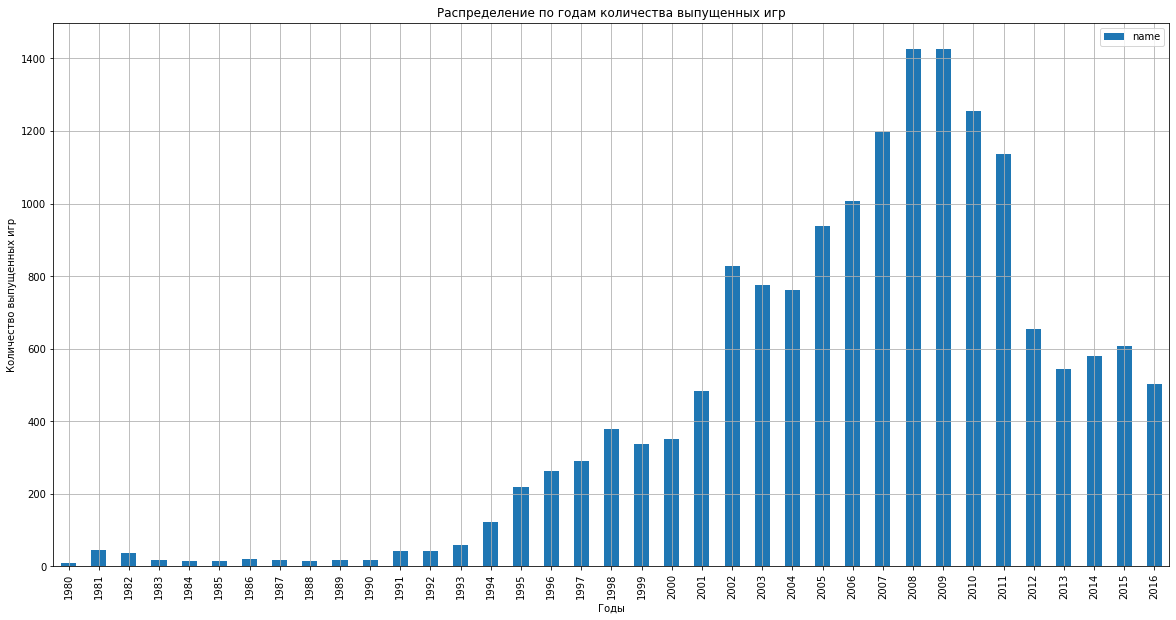

In [17]:
#построим свод с колличеством игр по годам
df.pivot_table(index='year_of_release',values='name',aggfunc='count').plot(kind='bar',grid='True',figsize=(20,10))
plt.title('Распределение по годам количества выпущенных игр')
plt.xlabel('Годы')
plt.ylabel('Количество выпущенных игр')
plt.show()

Глядя на гистограмму,можно сделать вывод,что до 1995 года игры практически не выпускались,кол-во составляет менее 500 за год. Активный рост индустрии начался с начала 2000-х,скорее всего это связано с высоким уровнем развития компьютерных технологий и то,что для людей появились новые способы развлечений,появился большой спрос,видно что пик приходится на 2010 год. 
Отвечая на вопрос,важны ли все данные,можно предположить,что данные до 1995 года не сильно повлияют на результат исследования

In [18]:
#Выявили платформы с наибольшими сумарными продажами
df_top_platform = df.pivot_table(index='platform',values='total_sales',aggfunc='sum').reset_index().sort_values(by='total_sales',ascending=False)
df_top_platform

,platform,total_sales
16,PS2,1233.56
28,X360,961.24
17,PS3,931.34
26,Wii,891.18
4,DS,802.78
15,PS,727.58
18,PS4,314.14
6,GBA,312.88
19,PSP,289.53
2,3DS,257.81


<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>Принял к сведению,благодарю за совет</font>
</div>

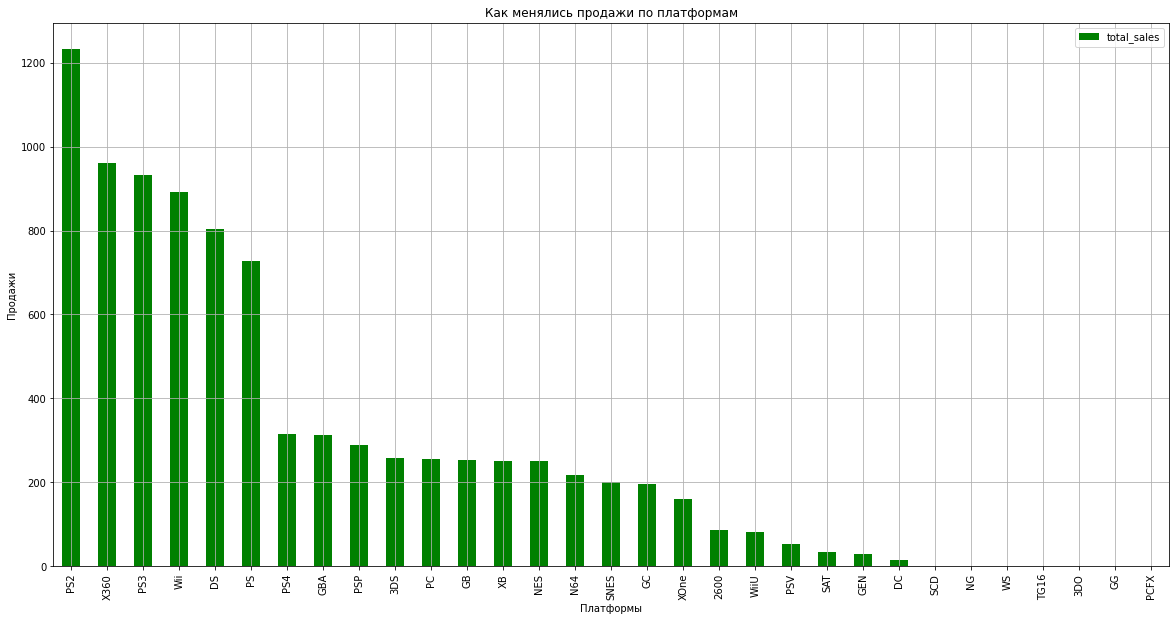

In [19]:
#построим график как менялись продажи по платформам
df_top_platform.plot(x='platform',kind='bar',color='green',grid=True,figsize=(20,10))
plt.title('Как менялись продажи по платформам')
plt.xlabel('Платформы')
plt.ylabel('Продажи')
plt.show()

По графику видно топ 6 лидирующих платформ. На основании топ 6 построим график распределения по годам

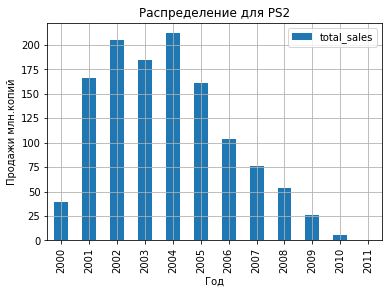

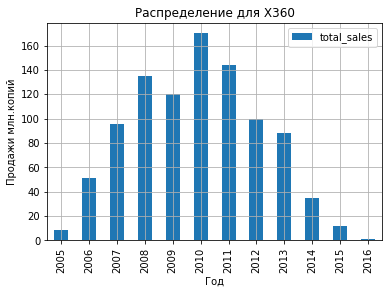

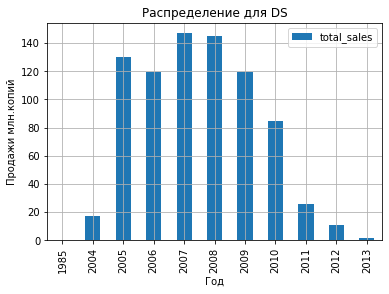

In [21]:
platform_list = ['PS2', 'X360', 'DS']

for pl in platform_list:
    df[df['platform'] == pl] \
                        .pivot_table(index='year_of_release',
                                     values='total_sales',
                                     aggfunc='sum') \
                        .plot(grid=True,kind='bar')

    plt.title('Распределение для {}'.format(pl))
    plt.xlabel('Год')
    plt.ylabel('Продажи млн.копий')
    plt.show()

Пик популярности PS2 приходится на период с 2002-2004 года

Пик популярности х360 приходится на 2010 год

Пик популярности PS3 приходится на 2011 год

In [25]:
#Удалим аномалию 1985 год,т.к. DS начали выпускать только в 2004 году

ds = df.query('platform == "DS"').pivot_table(index='year_of_release',values='total_sales',aggfunc='sum').reset_index().drop(labels=0)

ds = ds.pivot_table(index='year_of_release',values='total_sales',aggfunc='sum')
ds

,total_sales
year_of_release,
2004,17.27
2005,130.14
2006,119.81
2007,146.94
2008,145.31
2009,119.54
2010,85.02
2011,26.18
2012,11.01


Пик популярности DS приходится на 2007-2008 года.

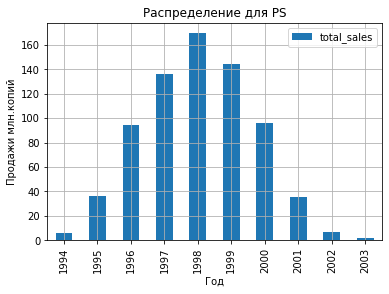

In [27]:
#построим график распределения для PS
df[df['platform'] == 'PS'].pivot_table(index='year_of_release',values='total_sales',aggfunc='sum')\
.plot(grid=True,kind='bar')
plt.title('Распределение для PS')
plt.xlabel('Год')
plt.ylabel('Продажи млн.копий')
plt.show()

Пик популярности Ps приходится на 1998 год.

###### Вывод
Мы построили графики распределения по годам 6 крупнейших платформ по продажам. Глядя на них можно сделать вывод,что в среднем характерный срок "жизни" платформы составляет около 10 лет,по графику это хорошо видно.Из 10 лет около 5-7 лет продажи идут очень хорошо,далее спад. Скорее всего по истечению времени выпускается обновленная платформа,с более современными технологиями и сменяет старую.

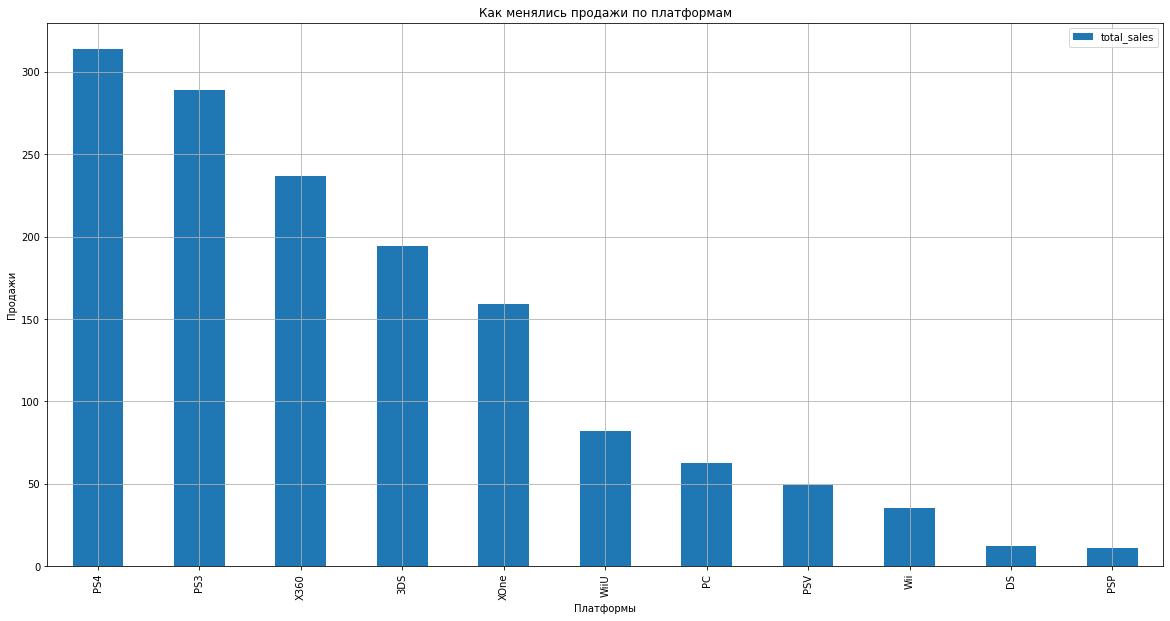

In [28]:
#построим график по актуальным данным,с 2012 года
games = df[df['year_of_release'] >= 2012]
games.pivot_table(index ='platform',values='total_sales',aggfunc='sum')\
.sort_values(by='total_sales',ascending=False)\
.plot(kind='bar',grid=True,figsize=(20,10))
plt.title('Как менялись продажи по платформам')
plt.xlabel('Платформы')
plt.ylabel('Продажи')
plt.show()

Глядя на новый график с актуальной информацией не ниже 2012 года,видно что лидеры поменялись.

Посмотрим какие платформы лидируют по продажам, растут или падают. Возьмем несколько потенциально прибыльных платформ.

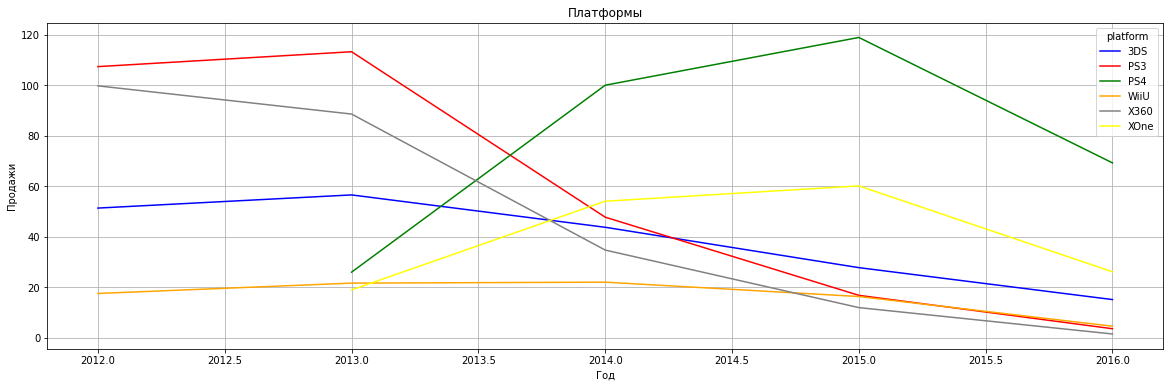

In [29]:
#построим график лидирующих топ 6 платформ по продажам,кто лидирует,кто растет,кто падает.
top_6 = ['PS4','PS3','X360','3DS','XOne','WiiU']
bar_colors = 'blue','red','green','orange','grey','yellow'
games.query('platform == @top_6').pivot_table(
    index='year_of_release',columns='platform',values='total_sales',aggfunc='sum').plot(grid=True,\
                                                                                       color=bar_colors,figsize=(20,6))
plt.xlabel('Год')
plt.ylabel('Продажи')
plt.title('Платформы')
plt.show()

Если брать актуальные данные,то видно что есть два лидера,которые показали лучший результат на фоне остальных это "PS4" и "Xone", что не удивительно,на тот момент времени это были новейшие консоли и самые популярные платформы в мире. Видно что пик продаж пришелся на начало 2015 года,возможно как раз предзаказы к моменту их выхода,далее покупки пошли на спад,но тем неменее они остались в лидерах

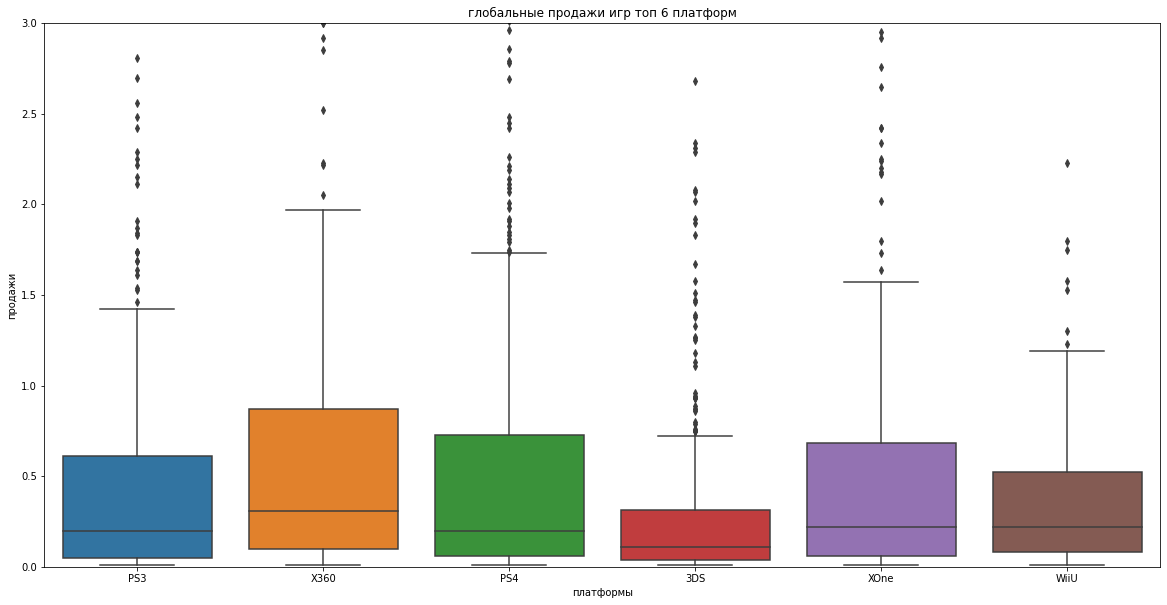

In [30]:
#Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам
games_top = games.query('platform == @top_6')
plt.figure(figsize=(20, 10))
plt.ylim(0, 3)
sns.boxplot(x='platform',y='total_sales',data=games_top)
plt.title('глобальные продажи игр топ 6 платформ')
plt.xlabel('платформы')
plt.ylabel('продажи')
plt.show()


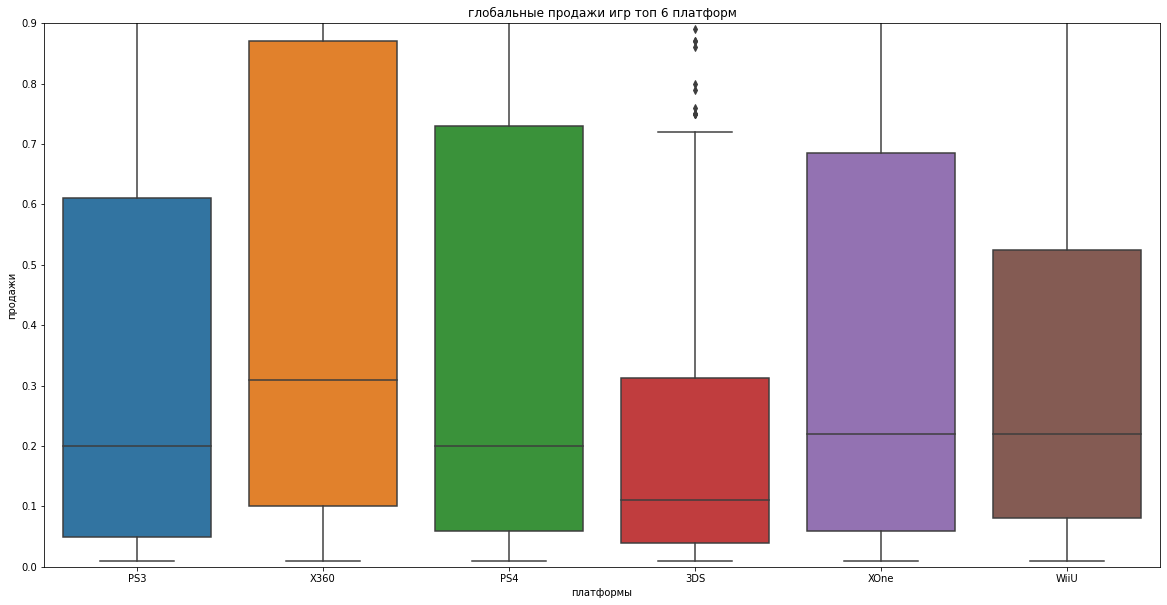

In [31]:
#Построим второй график «ящик с усами» по глобальным продажам игр в разбивке по платформам с теми же данными,
#но уменьшим параметр ylim для большей наглядности,что бы было четко видно нижнюю часть boxplot

games_top = games.query('platform == @top_6')
plt.figure(figsize=(20, 10))
plt.ylim(0, 0.9)
sns.boxplot(x='platform',y='total_sales',data=games_top)
plt.title('глобальные продажи игр топ 6 платформ')
plt.xlabel('платформы')
plt.ylabel('продажи')
plt.show()


На графике видно,что медиана находится ближе к нижней части,что дает понять что на платформах выходит достаточно много игр,но с не сильно высокими продажами

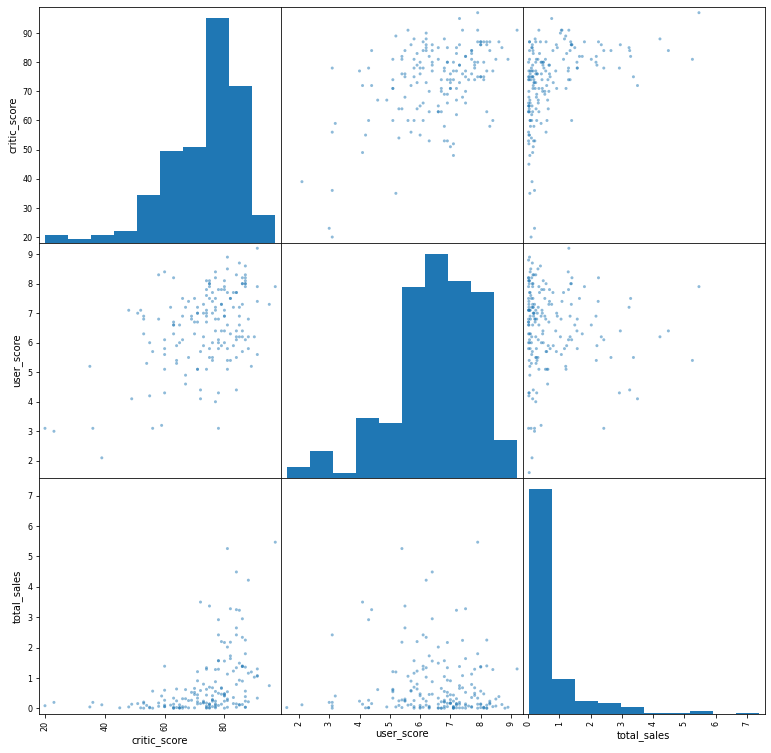

Корреляция между отзывами и продажами:

critic_score    0.416998
user_score     -0.068925
total_sales     1.000000
Name: total_sales, dtype: float64


In [32]:
#Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 
#Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами
xone = ['XOne']
games_top_xone = games_top.query('platform == @xone')
games_top_xone_matrix = games_top_xone[['critic_score', 'user_score', 'total_sales']]
pd.plotting.scatter_matrix(games_top_xone_matrix,figsize=(13,13))
plt.show()
print('Корреляция между отзывами и продажами:')
print()
print(games_top_xone[['critic_score', 'user_score', 'total_sales']].corr()['total_sales'])

Можно увидеть,что оценки пользователей на платформе Х360 не имеют корреляции с продажами на этой платформе,если глянуть на корреляцию от критиков,тут корреляция средне-слабая с "цифрами" продаж.


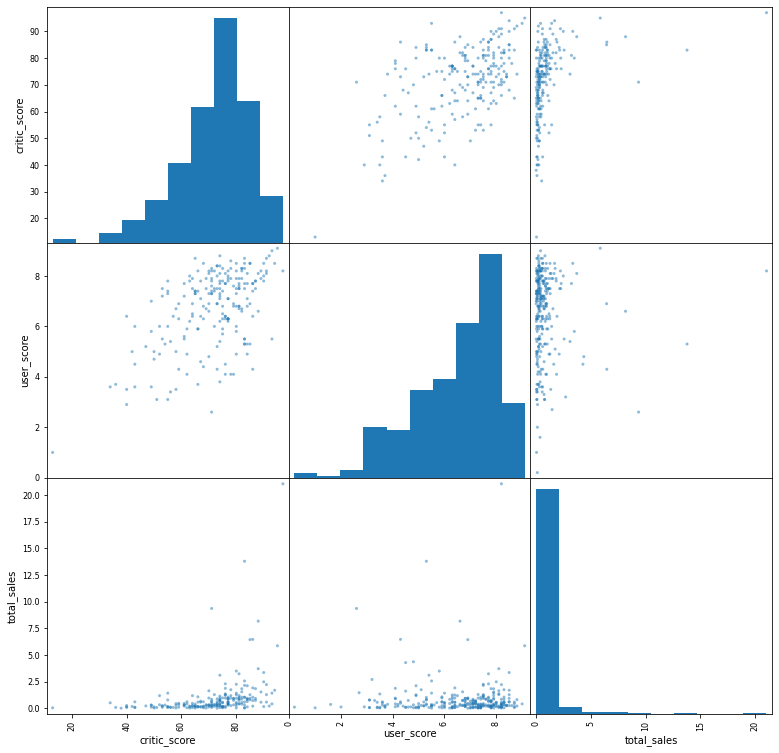

Корреляция между отзывами и продажами:

critic_score    0.331497
user_score     -0.005144
total_sales     1.000000
Name: total_sales, dtype: float64


In [33]:
#Соотнесем выводы с продажами игр на других платформах. 

ps3 = ['PS3']
games_top_ps3 = games_top.query('platform == @ps3')
games_top_ps3_matrix = games_top_ps3[['critic_score', 'user_score', 'total_sales']]
pd.plotting.scatter_matrix(games_top_ps3_matrix,figsize=(13,13))
plt.show()
print('Корреляция между отзывами и продажами:')
print()
print(games_top_ps3[['critic_score', 'user_score', 'total_sales']].corr()['total_sales'])


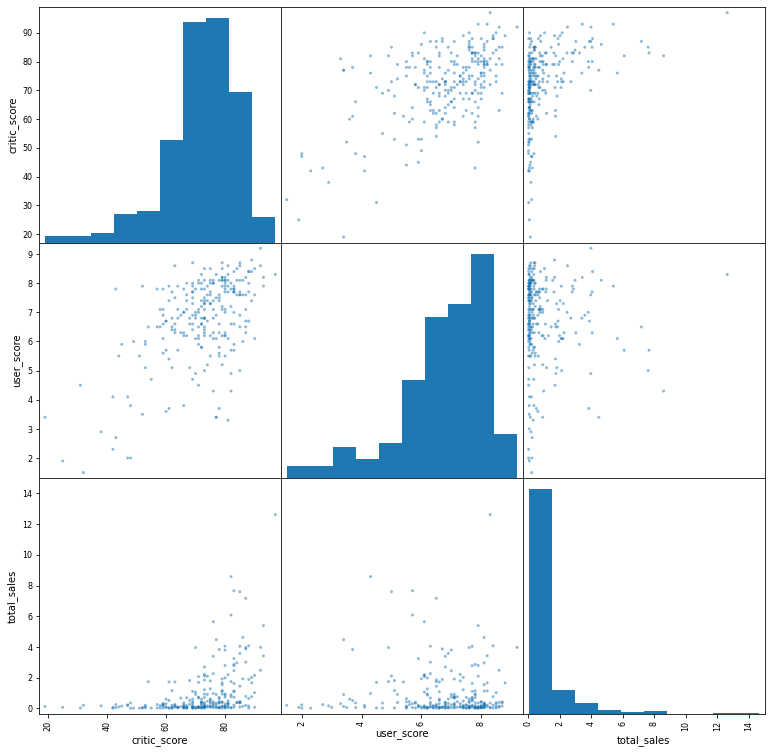

Корреляция между отзывами и продажами:

critic_score    0.406568
user_score     -0.031957
total_sales     1.000000
Name: total_sales, dtype: float64


In [34]:
#Соотнесем выводы с продажами игр на других платформах. 

ps4 = ['PS4']
games_top_ps4 = games_top.query('platform == @ps4')
games_top_ps4_matrix = games_top_ps4[['critic_score', 'user_score', 'total_sales']]
pd.plotting.scatter_matrix(games_top_ps4_matrix,figsize=(13,13))
plt.show()
print('Корреляция между отзывами и продажами:')
print()
print(games_top_ps4[['critic_score', 'user_score', 'total_sales']].corr()['total_sales'])


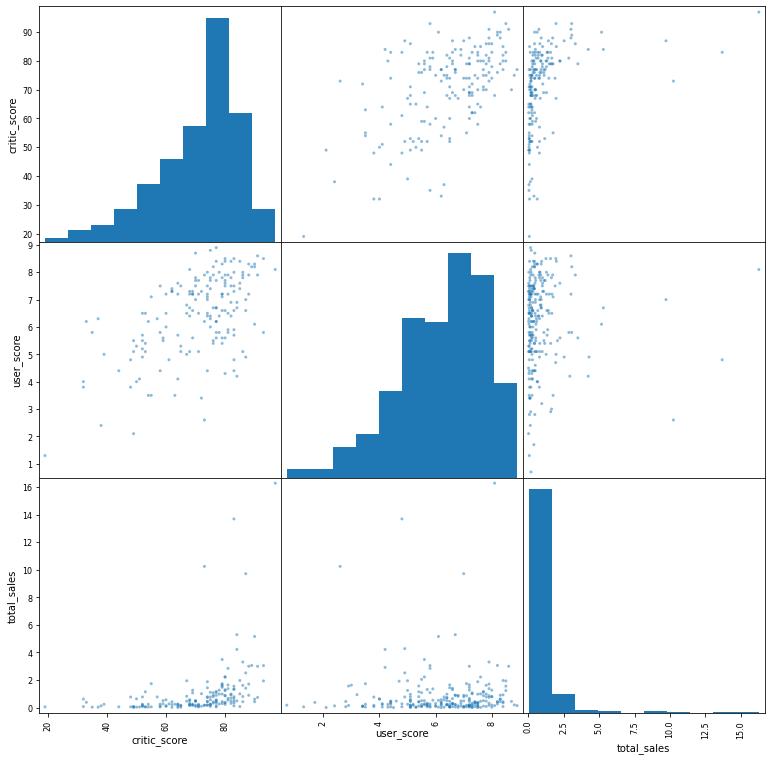

Корреляция между отзывами и продажами:

critic_score    0.360573
user_score      0.006164
total_sales     1.000000
Name: total_sales, dtype: float64


In [35]:
#Соотнесем выводы с продажами игр на других платформах. 

x360 = ['X360']
games_top_x360 = games_top.query('platform == @x360')
games_top_x360_matrix = games_top_x360[['critic_score', 'user_score', 'total_sales']]
pd.plotting.scatter_matrix(games_top_x360_matrix,figsize=(13,13))
plt.show()
print('Корреляция между отзывами и продажами:')
print()
print(games_top_x360[['critic_score', 'user_score', 'total_sales']].corr()['total_sales'])

Соотнесли выводы с платформы Xone с предыдущим поколением X360 и прямыми конкурентами PS3 и PS4 и можно сказать,что ситуации похожии,существенной разницы нет.

In [36]:
#Посмотрим на общее распределение игр по жанрам
games_genre = games.pivot_table(
    index='genre',values='total_sales',aggfunc='sum').reset_index().sort_values(
    by='total_sales',ascending=False)
games_genre

,genre,total_sales
0,Action,441.12
8,Shooter,304.73
7,Role-Playing,192.80
10,Sports,181.07
3,Misc,85.04
4,Platform,61.00
6,Racing,53.50
2,Fighting,44.49
9,Simulation,35.12
1,Adventure,29.43


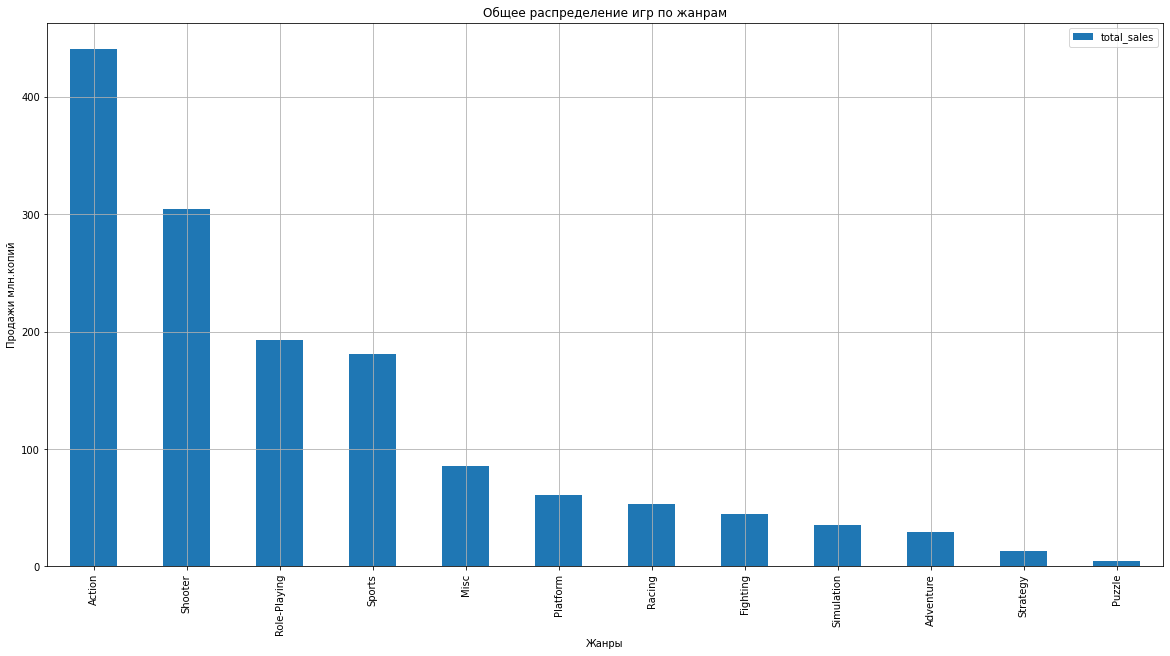

In [37]:
#Посмотрим на общее распределение игр по жанрам на графике
games_genre.plot(kind='bar',x='genre',grid=True,figsize=(20,10))
plt.title('Общее распределение игр по жанрам')
plt.xlabel('Жанры')
plt.ylabel('Продажи млн.копий')
plt.show()

Топ 4 самых продаваемых жанров:

1) Action - жанр видео игр, в котором делается упор на эксплуатацию физических возможностей игрока, в том числе координации глаз и рук и скорости реакции. Этот жанр вызывает наибольший интерес у пользователей,отличается своей динамичностью и захватывающим сюжетом.

2) Shooter - жанр видео игр, в которых игровой процесс основывается на сражениях с использованием огнестрельного или любого другого оружия с видом от первого лица таким образом, чтобы игрок воспринимал происходящее глазами протагониста. Кому из нас не хотелось бы после тяжелого дня зайти в игру и хорошенечко спустить пар,постреляв из оружия от первого лица:)

3) Role-Playing - знаменитый жанр видео игр, где основой игрового процесса является отогревание определенной роли. Игрок берёт под контроль определённого героя или героиню, с набором стандартных навыков, характеристик и умений. Играм этого жанра свойственны очень глубокие диалоги, нелинейное прохождение, использование продвинутого инвентаря и большие и открытые для исследования игровые пространства.

4) Sports - Жанр видео игр для любителей спорта и азарта,данный жанр погружает тебя в мир спорта,в нем вы можете ощутить себя в роли футболиста,баскетболиста,боксера или другого спортсмена. Можете брать в управление целые спортивные клубы или стать менеджером какого-нибудь например футбольного клуба. Как пример можно взять серию игр "fifa", это одна из самых популярных игр не только в своем жанре,но и в целом

Из самых непродаваемых игр можем выделить:

1) Pazzle - название жанра видео игр, целью которых является решение логических задач, требующих от игрока задействования логики, стратегии и интуиции. Не самые продаваемые игры,наверное потому что большинство из нас заходя в мир видеоигр погружается в свой отдельный мир и хочет как можно сильнее отвлечься от своих проблем,где не надо сильно задумываться,где можно сесть и расслабиться. Но не стоит исключать и тех людей,которые любят посидеть и над головоломками,их не так много,но всё же они есть :)

2) Strategy - жанр  видео игр, где игрок использует стратегическое планирование и тактику для достижения определённых целей. Игрок — командует, это основа геймплея. Основными признаками этого жанра можно назвать:
 Глобальное или тактическое управление (Войной, экономикой или всем одновременно).
 Обзор сверху, который позволяет оценить с большой высоты место деятельности (карту). 
 В большинстве своем в игры играют всё-таки дети и молодые люди,а этот жанр по моему мнению в большинстве своем предпочитает более взрослая аудитория. Хотя лично я с удовольствием в свободное время построил бы какую-нибудь империю и проверил свои навыки в стратегии,тут на вкус и цвет как говорится:)

In [38]:
#Посмотрим на медианное распределение игр по жанрам
games_genre_median = games.pivot_table(
    index='genre',values='total_sales',aggfunc='median').reset_index().sort_values(
    by='total_sales',ascending=False)
games_genre_median

,genre,total_sales
8,Shooter,0.440
10,Sports,0.240
4,Platform,0.210
7,Role-Playing,0.140
6,Racing,0.140
2,Fighting,0.130
0,Action,0.120
3,Misc,0.120
9,Simulation,0.120
11,Strategy,0.080


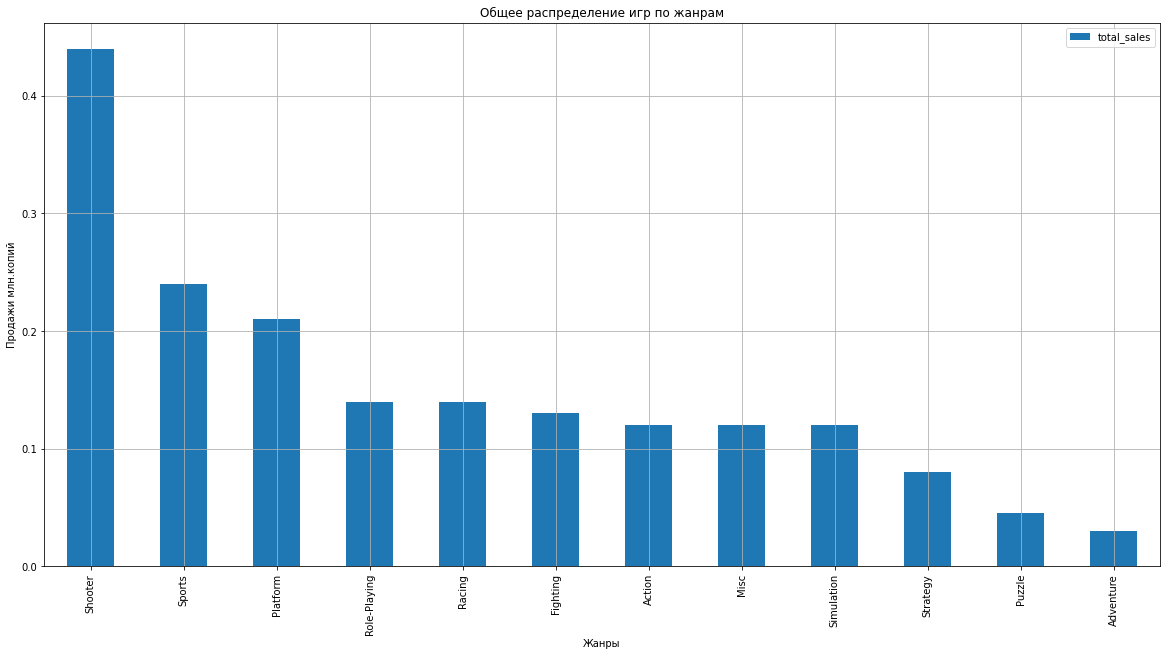

In [39]:
#Посмотрим на медианное распределение игр по жанрам на графике
games_genre_median.plot(kind='bar',x='genre',grid=True,figsize=(20,10))
plt.title('Общее распределение игр по жанрам')
plt.xlabel('Жанры')
plt.ylabel('Продажи млн.копий')
plt.show()

 По медианному колличеству продаж мы можем заметить,что лидеры поменялись,теперь мы можем наблюдать, что Шуттеры заняли первую позицию. Это обозначено тем,что игр в жанре Экшн выпускается значительно больше,чем других, практически в 2 раза. При этом доля кол-ва игр в жанре Шуттер всего лишь 8%. На фоне этого можем сделать вывод,что в жанре Экшн присутсвует большое кол-во непопулярных игр с низкими объемами продаж,в результать чего объем продаж берётся не качеством,а кол-во,что не скажешь о жанре Шуттер,где по результату видно,что данный жанр Шуттер имеет достаточное кол-во игр с высоким уровнем продаж. Так же с 4 места на второе переместился жанр Спорт,что тоже показывает уровень качества. Жанр РПГ сместился на 4 позицию,а в наш топ ворвался жанр Платформа. 
 Платформа - это жанр видео игр, в которых основу игрового процесса составляют прыжки по платформам, лазанье по лестницам, сбор предметов, необходимых для победы над врагами или завершения уровня.
 Что касается аутсайдеров нашего списка то самым плохим по качеству продаж стал жанр Adventure
 Adventure - довольно старый и распространённый жанр компьютерных и видео игр, в котором игрок управляет персонажем, продвигается по сюжету, решает головоломки и избегает опасностей. Далее на втором месте с конца остался жанр Пазлы,а за ним расположился нами известный жанр стратегии.
 

# Вывод

Мы провели исследовательский анализ данных,посмотрели сколько игр выпускалось в разные годы,отсеяли неактуальную информацию до 2012 года.

Проанализировали , как менялись продажи по платформам. Выбрали платформы с наибольшими суммарными продажами и построили распределение по годам.Провели анализ и узнали за какой характерный срок появляются новые и исчезают старые платформы.

Провели анализ и узнали какие платформы лидируют по продажам, какие растут или падают? Выбрали топ 6 потенциально прибыльных платформ

Построили график «ящик с усами» по глобальным продажам игр в разбивке по платформам.По нему увидели что медиана находится ближе к нижней части,что дает понять что на платформах выходит достаточно много игр,но с не сильно высокими продажами.

Проанализировали, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построили диаграмму рассеяния и посчитали корреляцию между отзывами и продажами. Соотнесли выводы с продажами игр на других платформах.

Проанализировали общее распределение по жанрам. Выбрали топ жанры и отстающие. Предположили почему некоторые жанры продаются лучше,а некоторые хуже





# 4. Составим портрет пользователя каждого региона

Определем для каждого региона (NA, EU, JP) самые популярные платформы (топ-5).

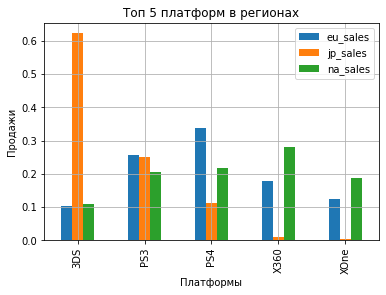

In [40]:
#возьмем топ 5 платформу,затем сгрупируем по платформам 3 разных региона
top_5 = ['PS4','PS3','X360','3DS','XOne']
games_top_5 = games.query('platform == @top_5')
games_top_5 = games_top_5.pivot_table(index='platform',values=['na_sales','eu_sales','jp_sales'],aggfunc='sum')
#узнаем в долях
games_top_5  = games_top_5 / games_top_5.sum() 

games_top_5.plot(grid=True,kind='bar')
plt.title('Топ 5 платформ в регионах')
plt.xlabel('Платформы')
plt.ylabel('Продажи')
plt.show()

In [53]:
#Доли в процентах
games_top_5.style.format("{:.1%}")



,eu_sales,jp_sales,na_sales
platform,,,
3DS,10.2%,62.3%,11.0%
PS3,25.6%,25.0%,20.7%
PS4,33.9%,11.3%,21.7%
X360,17.9%,1.1%,28.0%
XOne,12.4%,0.2%,18.6%


Из графика и процентного соотношения видно,что в Европе предпочитаю больше всего PS4 и PS3, в Японии с большим отрывом лидируют продажи 3DS, в Штатах люди отдают предпочтение X360,но по сравнению с Европой и Японией нет такого большого разрыва между консолями.

Определем для каждого региона (NA, EU, JP) самые популярные жанры (топ-5).

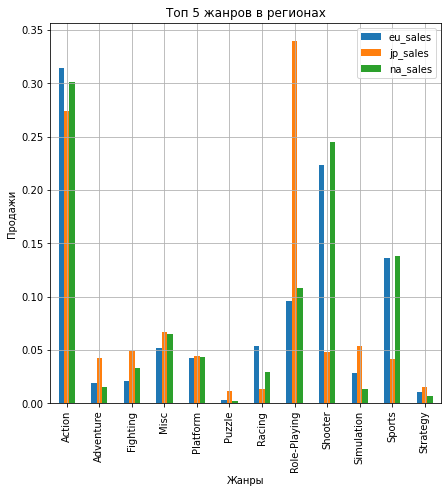

In [42]:
#возьмем топ 5 жанров,затем сгрупируем по жанрам 3 разных региона
games_top_5_genre = games.pivot_table(index='genre',values=['na_sales','eu_sales','jp_sales'],aggfunc='sum')
games_top_5_genre = games_top_5_genre / games_top_5_genre.sum()
games_top_5_genre.plot(grid=True,kind='bar',figsize=(7,7))
plt.title('Топ 5 жанров в регионах')
plt.xlabel('Жанры')
plt.ylabel('Продажи')
plt.show()

In [43]:
games_top_5_genre.sort_values(by=['na_sales','eu_sales','jp_sales'],ascending=False).style.format("{:.1%}")

,eu_sales,jp_sales,na_sales
genre,,,
Action,31.4%,27.4%,30.1%
Shooter,22.4%,4.8%,24.5%
Sports,13.6%,4.2%,13.8%
Role-Playing,9.6%,34.0%,10.8%
Misc,5.2%,6.7%,6.5%
Platform,4.2%,4.5%,4.3%
Fighting,2.1%,4.9%,3.3%
Racing,5.4%,1.3%,2.9%
Adventure,1.9%,4.3%,1.5%


Самыми популярными жанрами в Америке и Европе  является "Action",далее в Европе и Америке идет "Shooter" в то время как в Японии первую строчку занимает "Role-Playing",а уже вторую "Action". Что касается жанра "Shooter", то в Японии он даже не входит в топ 5,вот такая миролюбивая страна:) на 3 месте в Японии находятся "Misc",на 4 "Simulation" и топ 5 закрывает "Fighting". В США и Европе предпочтения по жанрам очень схожи,на 3 месте и там и там жанр "Sports", на 4 месте "Role-Playing	",а на 5 есть отличие,например в США 5 строчку занимает жанр "Misc",а в Европе "Racing".

Выясним влияет ли рейтинг ESRB на продажи в отдельном регионе

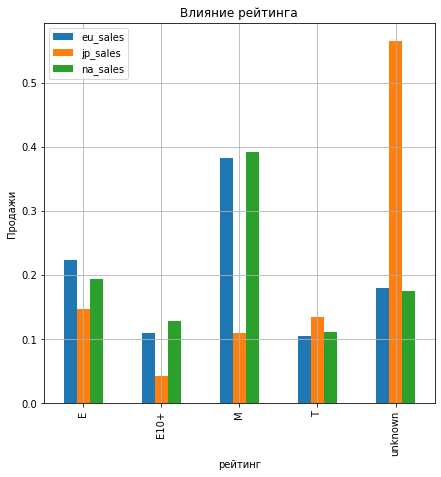

In [44]:
games_rating = games.pivot_table(index='rating',values=['na_sales','eu_sales','jp_sales'],aggfunc='sum')
games_rating = games_rating / games_rating.sum()
games_rating.plot(grid=True,kind='bar',figsize=(7,7))
plt.title('Влияние рейтинга')
plt.xlabel('рейтинг')
plt.ylabel('Продажи')
plt.show()


- E	Подходит для всех возрастных категорий. Игра не должна содержать звуков или изображений, которые могут напугать маленьких детей. Не должна использоваться ненормативная лексика. Примеры: Просто таннцуй, FIFA.
- E 10+	Подходит для лиц старше 10 лет. Игра может содержать умеренные формы насилия, а некоторые сцены могут пугать детей. Примеры: Minecraft Dungeons, Растения против зомби.
- T	Подходит для лиц старше 13 лет. Игра может содержать более реалистичные и натуралистические сцены насилия. Примеры: Fortnite, Sims 4.
- M	Подходит для лиц старше 17 лет. Этот рейтинг используется, когда насилие становится реалистичным и похожим на реальную жизнь. Также может присутствовать ненормативная лексика, употребление табака, алкоголя или запрещенных наркотиков. Примеры: Ark: Survival Evolved, Destiny 2.


In [45]:
games_rating.style.format("{:.1%}")

,eu_sales,jp_sales,na_sales
rating,,,
E,22.3%,14.7%,19.4%
E10+,10.9%,4.3%,12.8%
M,38.3%,11.0%,39.2%
T,10.4%,13.5%,11.2%
unknown,18.1%,56.5%,17.5%


В полученом исследовании видно,что в Японии в больше чем половине случаев отсутсвует рейтинг.Япония страна которая отличается своими обычиями и культурой.Computer Entertainment Rating Organization (CERO) — агентство по выдаче рейтинга в Японии. Если вы хотите издавать вашу игру на консолях в этой стране, вы обязаны получить этот рейтинг.Соответсвенно так много пропусков потому, что в Японии в основном используют другое рейтинговое агенство,которое более строгое,по сравнению с тем же ESRB.Так же можно предположить,игры без этого рейтинга - это локальные игры,выпущенны для внутреннего рынка.Европейцы и Американцы в этом смысле больше схожи. Возможно у них есть другой рейтинг,который является для них более авторитетным.Глядя на табличку и график видно,что у Европейцев и Американцев данные практически не отличаются.

# Вывод

Составили портрет пользователя каждого региона (NA, EU, JP):
Определили Самые популярные платформы (топ-5),выяснили их различия в долях продаж
Определили Самые популярные жанры (топ-5). Разобрались в чем разница между ними и какие пользуются спросом в разных регионах.
Проанализировали Влияет ли рейтинг ESRB на продажи в отдельном регионе.


#  5. Проверим Гипотезы

H_0: Средние пользовательские рейтинги (user_score) платформ Xbox One и PC одинаковые

H_1: Средние пользовательские рейтинги (user_score) платформ Xbox One и PC не являются  одинаковыми

In [46]:
#Построим сводную таблицу по платформам Хbox и PC и приведем к среднему оценки пользователей
games_platform = games.query('platform == ["XOne","PC"]')\
.pivot_table(index='platform',values='user_score',aggfunc='mean')
games_platform


,user_score
platform,
PC,6.428641
XOne,6.521429


In [47]:
# results = вызов метода для проверки гипотезы
results = st.ttest_ind(
    games.loc[games.platform == 'XOne','user_score'].dropna(),
    games.loc[games.platform == 'PC','user_score'].dropna(),
    equal_var = False)

# alpha = задайте значение уровня значимости
alpha = 0.05

# вывод значения p-value на экран 
print('p-значение:', results.pvalue)

# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу ')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


Различие средних значений статистически не значимо: средние пользовательские рейтинги Xbox One и PC практически не различаются.

H_0: Средние пользовательские рейтинги (user_score) жанров Action и Sports разные

H_1: Средние пользовательские рейтинги (user_score)  жанров Action и Sports не разные

In [48]:
#Построим сводную таблицу по жанрам action и sports и приведем к среднему оценки пользователей
games_genre =  games.query('genre == ["Action","Sports"]').pivot_table(index='genre',values='user_score',aggfunc='mean')
games_genre

,user_score
genre,
Action,6.825048
Sports,5.455897


In [49]:
# results = вызов метода для проверки гипотезы
results = st.ttest_ind(
    games.loc[games.genre == 'Action','user_score'].dropna(),
    games.loc[games.genre == 'Sports','user_score'].dropna(),
    equal_var = False)

# alpha = задайте значение уровня значимости
alpha = 0.05

# вывод значения p-value на экран 
print('p-значение:', results.pvalue)

# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу ')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 4.24307776572644e-20
Отвергаем нулевую гипотезу 


Различие средних значений статистически не значимо: средние пользовательские рейтинги Action и Sport различаются не сильно. Отвергаем нулевую гипотезу 

# 5. Вывод
Мы сформулировали нулевую гипотезу для проверки что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, и сформулировали альтернативную гипотезу, допустив что средние пользовательские рейтинги платформ Xbox One и PC не являются одинаковыми.
Подобным образом сформулировали нулевую гипотезу для проверки что средние пользовательские рейтинги жанров Action и Sports разные и сформулировали альтернативную гипотезу, допустив что средние пользовательские рейтинги жанров Action и Sports не являются разными.

Для проверки данных гипотез мы использовали t-критерий Стьюдента при помощи специального метода для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам.

# Общий вывод

В ходе исследования мы проделали следующие шаги:
    
    - Открыли файл с данными "/datasets/games.csv", и ознакомились с общей информацией.
    
    - Провели предобработку данных,привели столбцы к ккоректному формату,заменили на нужный тип.
    
    - Обработали пропуски,там где пропуски не повлияли бы на исследование - удалили их. Избавились от аномалий и проверили на уникальные значения
    
    - Провели исследовательский анализ,где отсеяли все года до 2012 года,что бы делать анализ по актуальным годам.
    
    - Мы выбрали топ 6 самых перспективных платформ, которыми оказались ('PS4','PS3','X360','3DS','XOne','WiiU'),проверили как долго платформы сохраняют свою доминацию на рынке. Выяснили что годы жизни в среднем около 7-10 лет.
    
    - В ходе исследования выяснили, что в Европе предпочитаю больше всего PS4 и PS3, в Японии с большим отрывом лидируют продажи 3DS, в Штатах люди отдают предпочтение X360,но по сравнению с Европой и Японией нет такого большого разрыва между консолями.
    
    - В ходе исследования выяснили что самыми популярными жанрами в Америке и Европе является "Action",далее в Европе и Америке идет "Shooter" в то время как в Японии первую строчку занимает "Role-Playing",а уже вторую "Action". Что касается жанра "Shooter", то в Японии он даже не входит в топ 5,вот такая миролюбивая страна:) на 3 месте в Японии находятся "Misc",на 4 "Simulation" и топ 5 закрывает "Fighting". В США и Европе предпочтения по жанрам очень схожи,на 3 месте и там и там жанр "Sports", на 4 месте "Role-Playing ",а на 5 есть отличие,например в США 5 строчку занимает жанр "Misc",а в Европе "Racing".
    
    - В ходе исследования выяснили что оценки пользователей на платформе Х360 не имеют корреляции с продажами на этой платформе,если глянуть на корреляцию от критиков,тут корреляция средне-слабая с "цифрами" продаж.. Так же провели исследование и по другим топовым платформам,результат оказался +\- подобным.
    
    - Проверили две гипотезы и в результате получили что:
    1) Различие средних значений статистически не значимо: средние пользовательские рейтинги Xbox One и PC практически не различаются.
    2) Различие средних значений статистически не значимо: средние пользовательские рейтинги Action и Sport различаются не сильно. Отвергаем нулевую гипотезу
   
Исходя из нашего исследования стоит выделить две самые выгодные платформы с точки зрения их популярности  и актуальности текущего времени - это PS4 и PS3,стоит обратить внимание именно на них выстраивая стратегию на 2017 год.
Что касается жанров, то самыми рентабельными с точки зрения продаж являются шуттеры и спортивные игры. Например индустрия киберспорта развивается семимильными шагами и там присутствуют огромные рекламные компании,огромные бюджеты и крупные инвесторы,их рекламируют знаменитости из абсолютно разных сфер. Как пример можно привести серию игр "FIFA",в эту игру играют спортсмены с огромным кол-вом подписчиков,часто выставляя это на свою аудиторию,которая может превышать и 100+ миллионов людей,соревнования в этой дисциплине проходят как и на локальных уровнях так и на мировых аренах! Если взять отдельно взятый регион Японию,то здесь ситуация складывается немного по другому,во первых в Японии преобладает другая платформа "DS3",нельзя сказать что PS там не пользуется спросом,но DS3 явно преобладает.Во вторых нельзя со 100% уверенностью доверять рейтингу ESRB т.к. в Японии в более чем 50% случаев он отсутсвует,у них есть свой отдельно взятый рейтинг. Что касается жанров,то в этом регионе люди предпочитают РПГ игры,лучше сделать акцент на них. В целом это говорит о том,что у Японского рынка своя особенность,под которую нужно продумывать стратегию иначе,чем под Европейский а Американские рынки. Что касается рейтинга ESRB для европейский и американских рынов,можно увидеть что категория М,а это  игры который Подходят для лиц старше 17 лет. Этот рейтинг используется, когда насилие становится реалистичным и похожим на реальную жизнь. Также может присутствовать ненормативная лексика, употребление табака, алкоголя или запрещенных наркотиков. Стоит обратить что это люди старше 17+, одна из самых платежеспособных и заинтересованых категорий,поэтому стоить обратить на это внимание.Кстати некоторые шуттеры как раз могут попасть в эту категорию. Что касается отзывов от пользователей и критиков,в ходе исследования мы увидели,что корреляция между отзывами пользователей и продажами отсутсвует,а корреляция между отзывами критиков и продажами крайне мала,поэтому на мой взгляд я бы не рассматривал этот фактор,ну а если и брать в учет,то далеко не в первую очередь.
